# Projeto ICD-TP-SOJA

Esse notebook compõe toda a apresentação do projeto, quanto aos passos tomados, desde o processamento inicial dos dados até as tentativas de ensinar a máquina.

Começamos processando os dados e fazendo comentários. Então, passamos para análise de cada pergunta do projeto individualmente.

In [1]:
import lib # Biblioteca local, com todas as classes necessárias
import warnings
#warnings.filterwarnings('ignore')

In [2]:
# Vamos pegar a tabela já pre-processada
tabela = lib.process().get_table()

/home/yowgf/repos/brazil-soy-production/src/lib/process.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  united = t283_not2006.append(t6588)


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


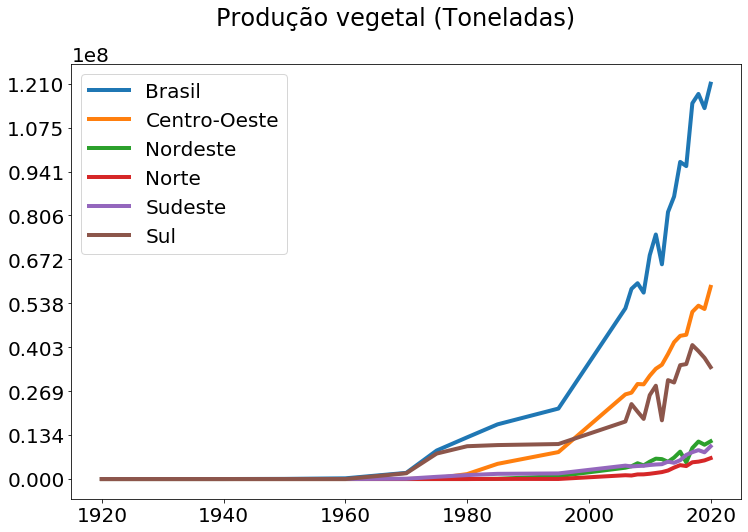

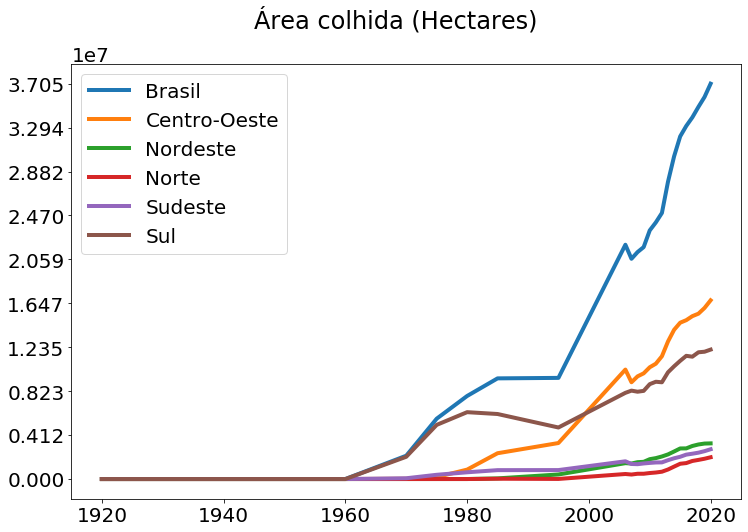

In [3]:
# Vamos visualizar os dados
lib.visualize(tabela);

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


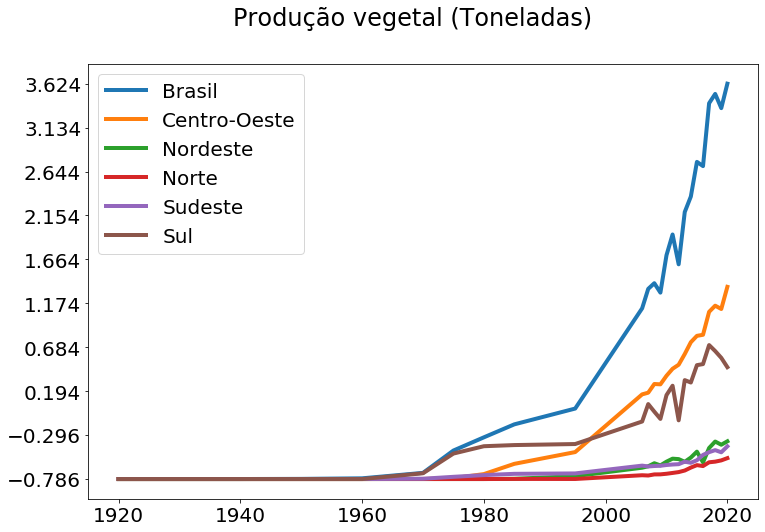

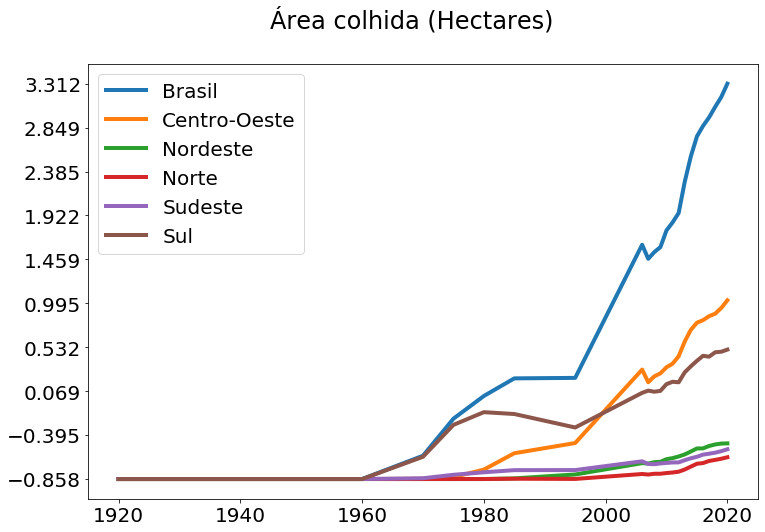

In [4]:
# Se normalizarmos, a figura não deve mudar muito.
# Mas vamos ver:
tabela_norm = lib.process.normalize(tabela)
lib.visualize(tabela_norm);

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


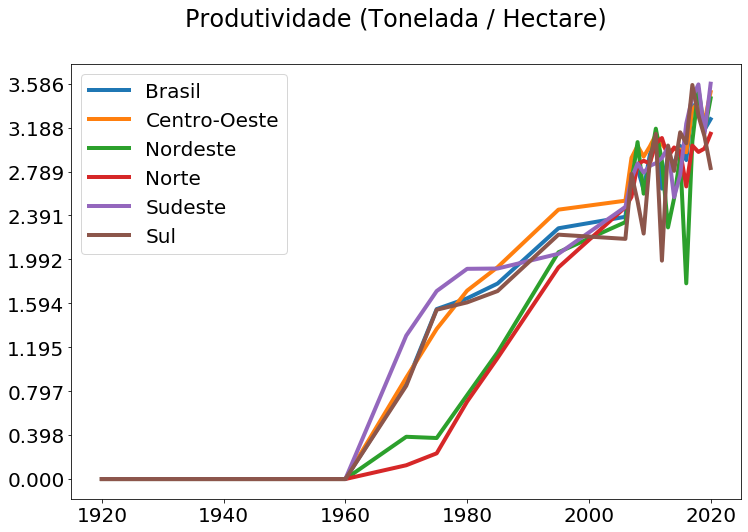

In [5]:
# Agora vamos ver o gráfico quando consideramos a
#   produtividade(produção / área)
tabela_prod = lib.process.prod(tabela)
lib.visualize(tabela_prod);

Fica claro como nos últimos anos o crescimento desacelerou um pouco.

# Agora, vamos perguntar aos dados:

1. Qual é a forma do crescimento da área colhida de soja, para cada estado do país? Como explicar essa distribuição nos últimos 10 anos?
2. A variação da área utilizada para plantio de soja na região Sudeste segue qual tendência, com base nos últimos 10 anos? Por quê?
3. Qual a tendência atual de variação, com base nos últimos 10 anos, da produtividade por área do plantio de soja nacional? Por quê?

#### PERGUNTA 1

- Qual é a forma do crescimento da área colhida de soja, para cada estado do país? Como explicar essa distribuição nos últimos 10 anos?

Como vimos acima, esse crescimento pode ser dividido em duas partes: quando a soja chegou no Brasil, foi primeiro implantada na região Sul, por conta do clima mais adequado à cultivar. Com o desenvolvimento da Engenharia Agrícola no Brasil, principalmente dentro da EMBRAPA, foram desenvolvidas cultivares geneticamente modificadas que se adaptaram bem ao clima no Centro-Oeste, onde havia, ainda, muita terra barata.

Com isso, vem a segunda parte da separação evidente pelo gráfico: próximo dos anos 2000, o Centro-Oeste ultrapassou o Sul tanto em área colhida quanto em produção vegetal, e lidera o cenário até hoje.

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


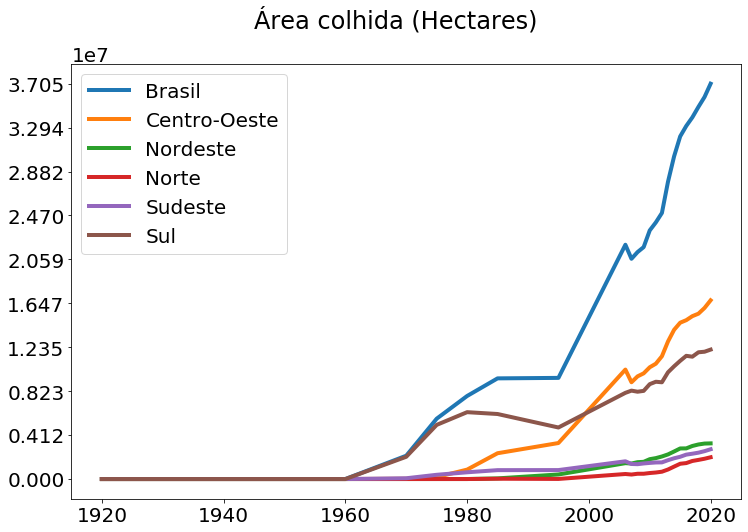

In [6]:
tabela_area = tabela.drop(columns=['Produção vegetal (Toneladas)'])
lib.visualize(tabela_area);

Agora, vamos focar nos últimos 10 anos:

In [7]:
growth = lib.utils.growth(tabela_area, (2011, 2020))
growth

,Crescimento anual médio (%)
Região,
Sul,3.671425
Brasil,6.007537
Centro-Oeste,6.108659
Nordeste,7.829479
Sudeste,8.864518
Norte,25.951322


Parece que a região Norte cresceu muito mais, relativamente. Porém, deve-se notar que, como há uma grande influência da quantidade *absoluta* de produção vinda de regiões próximas, e até mesmo de todo o Brasil, na produção do Norte, esse crescimento não é tão significativo.

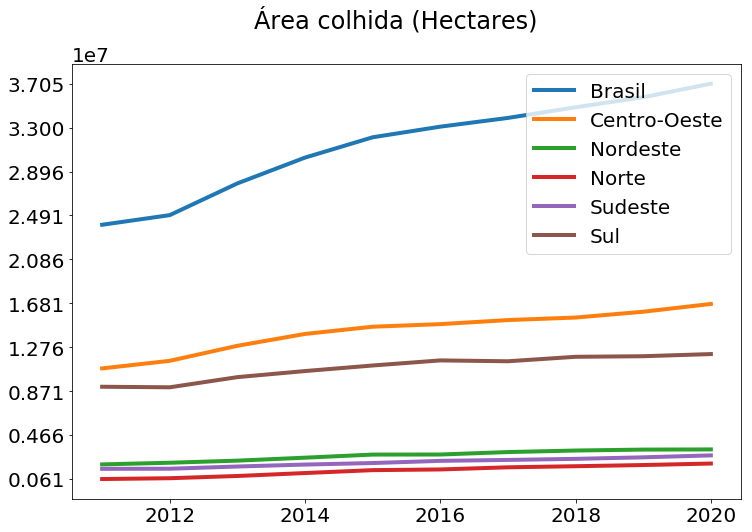

In [8]:
# Crecimento a partir de 2011
tabela_area_10anos = tabela_area[tabela_area['Ano'] >= 2011]
lib.visualize(tabela_area_10anos);

#### PERGUNTA 2

- A variação da área utilizada para plantio de soja na região Sudeste segue qual tendência, com base nos últimos 10 anos? Por quê?

Ao iniciar o trabalho, essa pergunta parecia interessante. Como o Sudeste é mais povoada, existe menos área disponível para plantio de soja, tendendo a diminuir a atratividade da região. De outro lado, a proximidade ao consumidor poderia fazer com que a atratividade aumentasse. Qual seria o resultado desse contrabalanceio? Afinal, hoje em dia o Sudeste é ou não é uma região atraente aos produtores de soja?

Infelizmente, nossos dados não nos ajudam muito a responder essa questão, tudo o que podemos ver é um tedioso e monótono crescimento, confundível por aleatoriedade com o Nordeste e o Norte, o que, na perspectiva estatística, dá margem para a aceitação da hipótese nula.

Vamos testar isso abaixo, primeiro entre (Sudeste, Nordeste), e depois (Sudeste, Norte), através de testes A/B.

In [9]:
# Precisamos da versão normalizada e que tem o crescimento
#   (ano atual menos anterior) da area colhida, ao inves da 
#   area em si
tab = lib.process.fetchab(tabela, 2011)

# Processamento para gerar tabela com crescimento
sudeste, nordeste, norte  = lib.process.sep_reg(tab, ['Sudeste', 'Nordeste', 'Norte'])

# Printar diferenças originais
lib.visualize.print_diff(sudeste, nordeste, title='Sudeste X Nordeste')
lib.visualize.print_diff(sudeste, norte, title='Sudeste X Norte')

# Realizar teste AB com cada par atraves da 
#   diferença absoluta media
absnordeste = lib.utils.ab(sudeste, nordeste)
absnorte = lib.utils.ab(sudeste, norte)
# Obter intervalos de confiança
icsnordeste = lib.utils.ic(absnordeste)
icsnorte = lib.utils.ic(absnorte)
print("\nINTERVALOS DE CONFIANÇA")
lib.visualize.print_ics(icsnordeste, title='Sudeste X Nordeste')
lib.visualize.print_ics(icsnorte, title='Sudeste X Norte')

Sudeste X Nordeste
Diferença: 4.45728049414063
Sudeste X Norte
Diferença: 9.087811044363852

INTERVALOS DE CONFIANÇA
Sudeste X Nordeste
(2.739840660479744, 6.325107873114593)
Sudeste X Norte
(4.825909216198154, 11.34310622189465)


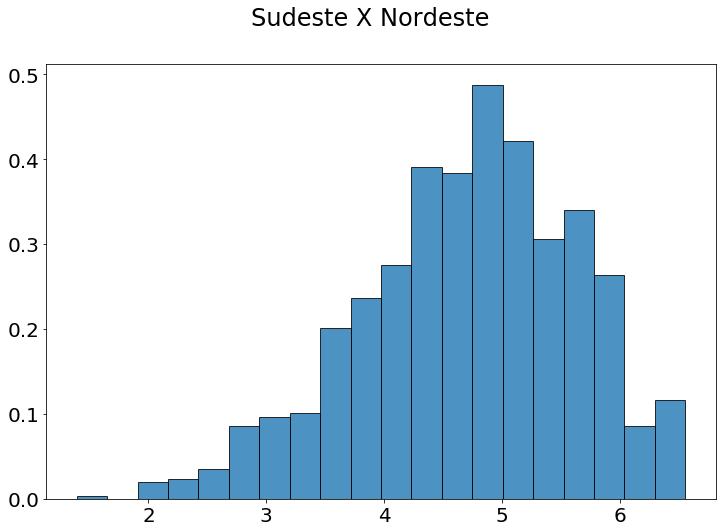

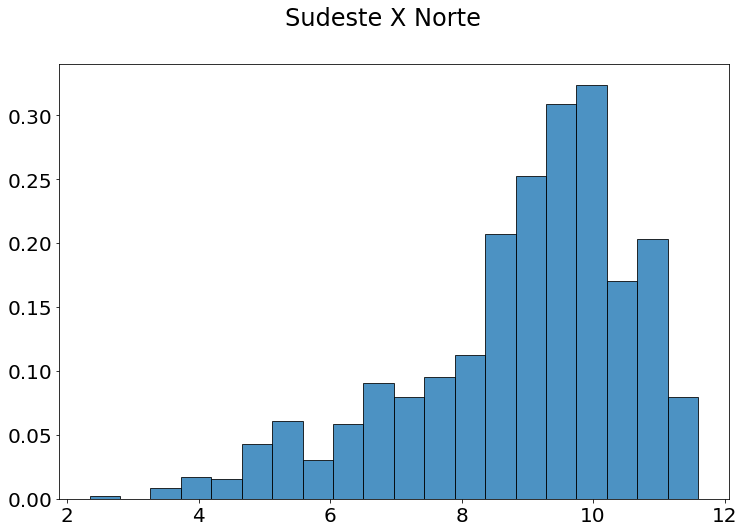

In [10]:
# Plotar os histogramas
lib.visualize.plot_hists(absnordeste, title='Sudeste X Nordeste')
lib.visualize.plot_hists(absnorte, title='Sudeste X Norte')

Então, a hipótese nula - o crescimento da região Sudeste não foi diferente das regiões Norte e Nordeste, senão por aleatoriedade - deve ser aceita com significância 0.05. As médias obtidas na prática estão dentro do intervalo de confiança, quando realizado o teste A/B. Os gráficos par a par da distribuição amostral são dados abaixo.

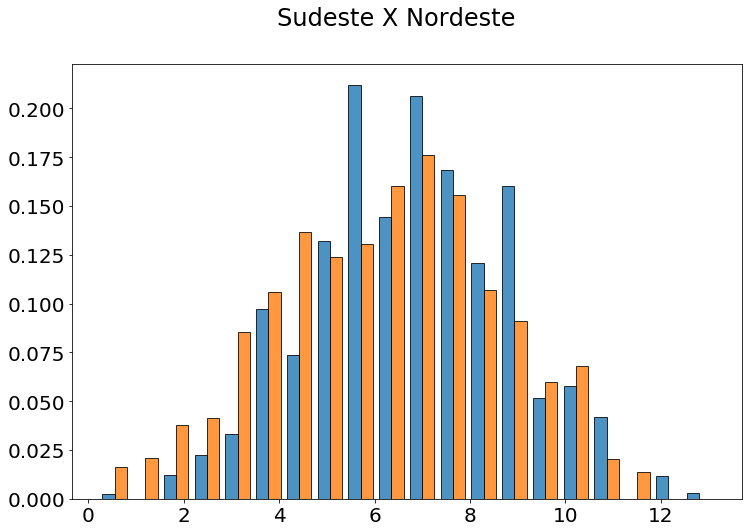

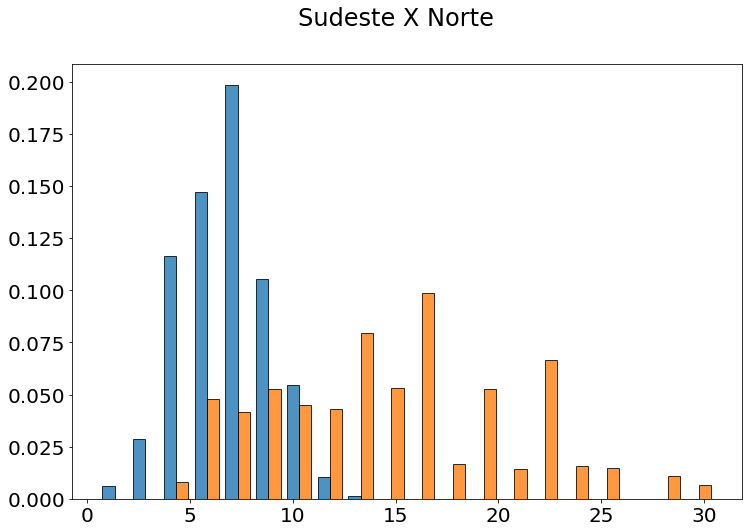

In [11]:
# Bootstrap dos tres
boot_sudeste = lib.utils.bootstrap(sudeste.iloc[::, -1])
boot_nordeste = lib.utils.bootstrap(nordeste.iloc[::, -1])
boot_norte = lib.utils.bootstrap(norte.iloc[::, -1])

lib.visualize.plot_hists((boot_sudeste, boot_nordeste), title='Sudeste X Nordeste')
lib.visualize.plot_hists((boot_sudeste, boot_norte), title='Sudeste X Norte')

Mesmo que no caso da comparação com a região Norte existe uma difença maior, isso se deve ao fato de que o crescimento no Norte ter uma varirância muito alta, como fica evidente pelo achatamento e caráter esparso do histograma em laranja, acima, o que diminui a confiabilidade da amostra em representar a população.

#### PERGUNTA 3

- Qual a tendência atual de variação, com base nos últimos 10 anos, da produtividade por área do plantio de soja nacional? Por quê?

Primeiramente, vamos dar um foco no Brasil no gráfico de área:

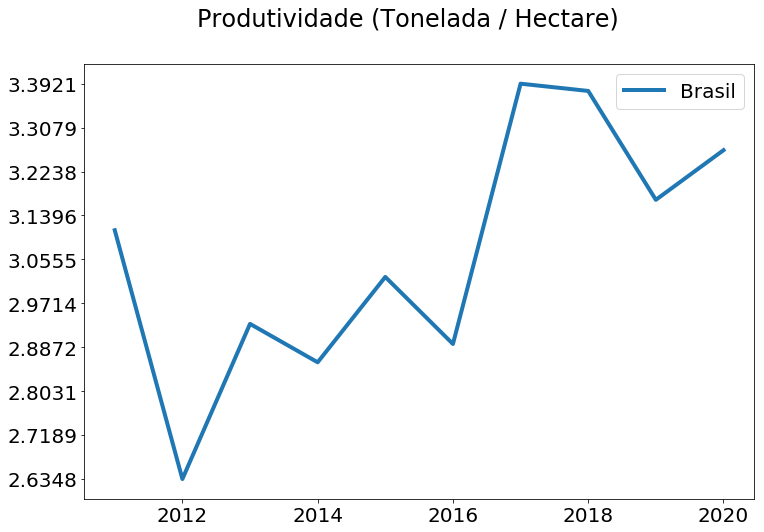

In [12]:
tp10_brasil = tabela_prod[(tabela_prod['Ano'] >= 2011) & (tabela_prod['Região'] == 'Brasil')]
lib.visualize(tp10_brasil);

Vamos tentar fazer uma regressão linear para ver como fica, apesar de que parece que o ruído está muito alto, precisamos de mais dados...

In [13]:
x = tp10_brasil['Ano']
y = tp10_brasil['Produtividade (Tonelada / Hectare)']
predictor = lib.ml.lin_reg(x, y)

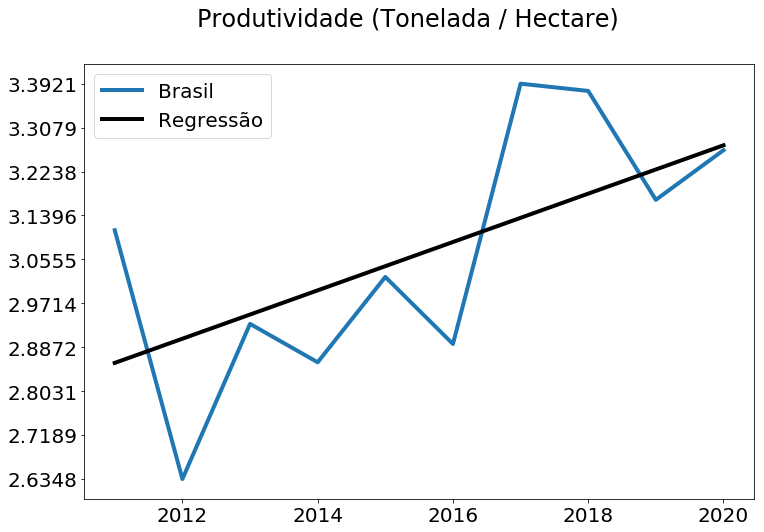

In [14]:
# Vamos dar uma olhada em como ficou
lib.visualize.plot_lr(predictor, tp10_brasil)

É, realmente, está muito ruim. Vamos tentar utilizar todos os exemplos disponíveis, ao invés de nos basearmos nos últimos dez anos, a pergunta foi mal formulada. Apesar de haver uma tendência da realidade de estar mais ligada a eventos mais atuais, uma regressão mais complexa talvez consiga capturar isso melhor, ao aplicá-la em todo o banco de dados.

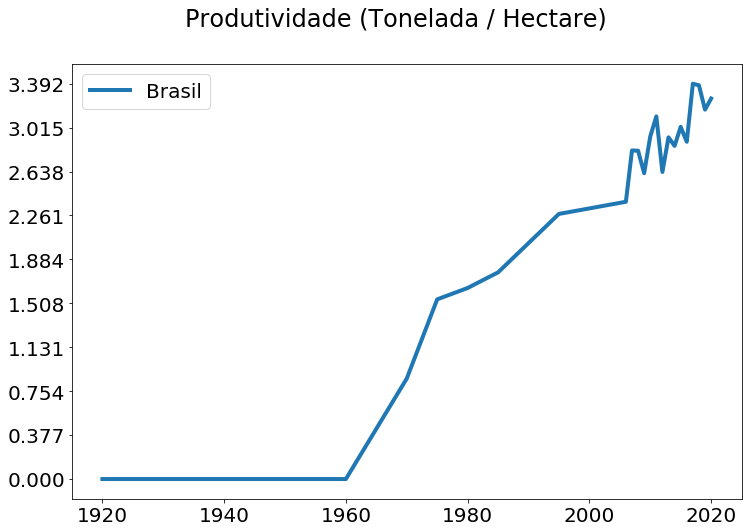

In [15]:
# Tabela de produtivividade com todos os anos
tp_brasil = tabela_prod[tabela_prod['Região'] == 'Brasil']
lib.visualize(tp_brasil);

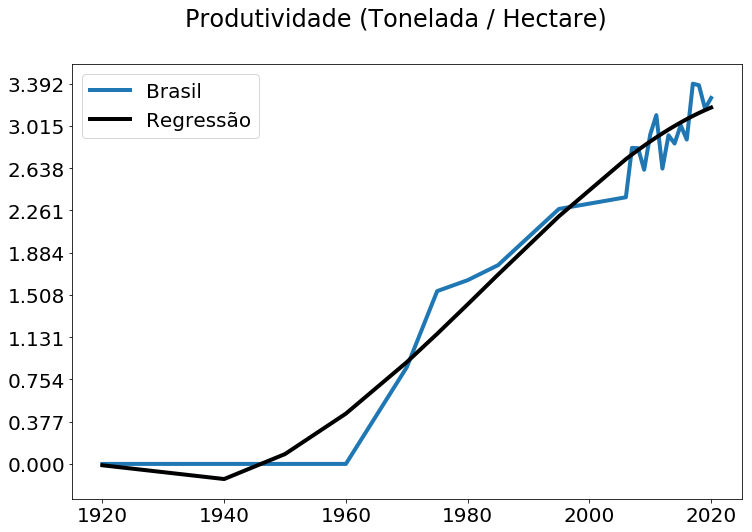

In [16]:
# Vamos tentar modelar o crescimento por
#   um algoritmo mais esperto (regressão
#   polinomial com grau de 0 a 5)
X, y = lib.process.xy_poly(tp_brasil)
polyreg = lib.ml.poly_reg(X, y, degree=5)

lib.visualize.plot_pr(polyreg, tp_brasil)

Como se pode ver, foi detectada uma tendência de constância (aceleração negativa) a partir de um ponto próximo ao ano 2000. Para deixar mais claro, vamos estender o gráfico até 2050 para ver o que a regressão prevê que acontecerá no futuro.

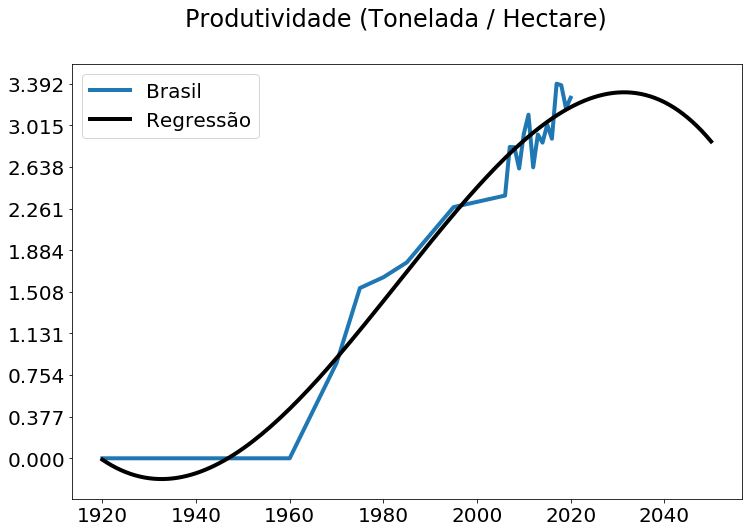

In [17]:
lib.visualize.plot_pr(polyreg, tp_brasil, period=(1920, 2050))

Não faz sentido que a produtividade diminua após certo tempo, como o gráfico parace indicar, mas o importante é que foi detectada uma tendência de **desaceleração**.

Respondendo ao porquê de nossa pergunta, poderiamos inferir, com base na realidade (nossos dados não nos levam além de *mostrar* a desaceleração), que como em muitos processos físicos, aqui existe uma limitação natural da produtividade, e estamos bem próximos dela.

Poderia ser, também, que simplesmente passamos por uma fase nessa evolução das tecnologias para plantio de soja, em que não existe muito progresso, e que, depois de certo tempo, por conta de alguma descoberta, haveria novamente uma aceleração na produtividade.

In [18]:
# Estimativa do pico de produtividade (Tonelada / Hectare) no Brasil
# Ignoramos a parte da regressão que têm velocidade negativa, pois
#   não é condizente com a realidade
# Considerei a raiz quadrada do erro quadrado medio para construir
#   o intervalo abaixo
maximo, ano_maximo, maximo_ic = lib.ml.predict_max(polyreg, tp_brasil, (1920, 2050))
print('Máximo =',maximo)
print('Ano correspondente =', ano_maximo)
print('Intervalo:', maximo_ic)

Máximo = 3.314
Ano correspondente = 2032
Intervalo: (2.654, 3.974)


Ou seja, estima-se que a produtividade se manterá constante por volta de **3.3 toneladas por hectare**, no Brasil. Considerando o erro médio obtido pelo estimador, podemos dizer que **não deve passar de 4 toneladas por hectare** até 2032.